In [1]:
import torch


In [3]:
a = torch.ones(5)

In [4]:
a


tensor([1., 1., 1., 1., 1.])

In [5]:
a.numel()

5

In [6]:
import numpy as np
n = np.array([1, 2, 3, 4, 5])

In [7]:
b = torch.from_numpy(n)

In [8]:
b

tensor([1, 2, 3, 4, 5])

In [9]:
n

array([1, 2, 3, 4, 5])

In [13]:
a = torch.arange(12).reshape(3,4)

In [21]:
a.shape

torch.Size([3, 4])

In [22]:
a = torch.arange(12)
a

tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

In [23]:
a.size()

torch.Size([12])

In [24]:
a.shape

torch.Size([12])

In [25]:
a.view()

TypeError: view() received an invalid combination of arguments - got (), but expected one of:
 * (tuple of ints size)
 * (torch.dtype dtype)


In [26]:
a.is_contiguous()

True

In [27]:
A = np.array([
    [1,2],
    [3,4]
])

In [28]:
B = A.copy()


In [29]:
A * B

array([[ 1,  4],
       [ 9, 16]])

In [30]:
np.dot(A, B)

array([[ 7, 10],
       [15, 22]])

In [31]:
A = torch.from_numpy(A)

In [32]:
B = A.copy_()

TypeError: copy_() received an invalid combination of arguments - got (), but expected (Tensor other, bool non_blocking)

In [33]:
B = A.copy()

AttributeError: 'Tensor' object has no attribute 'copy'

In [36]:
A.sum(axis=1)


tensor([3, 7])

In [37]:
A

tensor([[1, 2],
        [3, 4]])

In [44]:
B = torch.full_like(A, 1)
B

tensor([[1, 1],
        [1, 1]])

In [45]:
A


tensor([[1, 2],
        [3, 4]])

In [46]:
A.sum(axis=1)

tensor([3, 7])

In [48]:
A.sum(axis=1, keepdims=True)

tensor([[3],
        [7]])

In [49]:
A / A.sum(axis=1)

tensor([[0.3333, 0.2857],
        [1.0000, 0.5714]])

In [50]:
A / A.sum(axis=1, keepdims=True)

tensor([[0.3333, 0.6667],
        [0.4286, 0.5714]])

In [51]:
x = torch.tensor([1, 2])
y = torch.tensor([3, 4])
torch.dot(x, y)

tensor(11)

In [52]:
torch.sum(x * y)

tensor(11)

In [53]:
c = torch.tensor([5, 6])

In [55]:
torch.mv(a, c, out=None)

RuntimeError: vector + matrix @ vector expected, got 1, 1, 1

In [56]:
A


tensor([[1, 2],
        [3, 4]])

In [57]:
c

tensor([5, 6])

In [58]:
np.dot(A, c)

array([17, 39])

In [59]:
mat = torch.randn(2, 3)
vec = torch.randn(3)
torch.mv(mat, vec, out=None)

tensor([-2.4473, -0.8687])

In [60]:
mat

tensor([[-1.1131, -1.5231, -0.0615],
        [ 0.3777, -0.5022,  0.1391]])

In [61]:
vec

tensor([-0.1924,  1.7268,  0.5115])

In [62]:
torch.dot(A, c)

RuntimeError: 1D tensors expected, but got 2D and 1D tensors

In [63]:
torch.dot(A, B)

RuntimeError: 1D tensors expected, but got 2D and 2D tensors

In [64]:
B


tensor([[1, 1],
        [1, 1]])

In [65]:
A

tensor([[1, 2],
        [3, 4]])

In [66]:
torch.mv(A, c)

tensor([17, 39])

In [67]:
torch.mm(A, B)

tensor([[3, 3],
        [7, 7]])

In [97]:
x = torch.arange(4.0)
x

tensor([0., 1., 2., 3.])

In [98]:
x.requires_grad_(True)
x.grad

In [99]:
x

tensor([0., 1., 2., 3.], requires_grad=True)

In [100]:
print(x.grad)

None


In [101]:
y = 2 * torch.dot(x, x)

In [102]:
y

tensor(28., grad_fn=<MulBackward0>)

In [103]:
y.backward()


In [104]:
x.grad

tensor([ 0.,  4.,  8., 12.])

In [105]:
x.grad == 4 * x

tensor([True, True, True, True])

In [116]:
x.grad.zero_()
y = sum(x)
y.backward()
x.grad

tensor([1., 1., 1., 1.])

In [117]:
x.grad.zero_()
y = torch.dot(x, x)
y.sum().backward()
x.grad

tensor([0., 2., 4., 6.])

In [123]:
x.grad.zero_()
y = x * x
u = y.detach()
z = u * x

z.sum().backward()


In [124]:
u

tensor([0., 1., 4., 9.])

In [125]:
x.grad.zero_()
y = x * x
z = y * x
z.sum().backward()
x.grad

tensor([ 0.,  3., 12., 27.])

In [127]:
from torch.distributions import multinomial
from d2l import torch as d2l


In [128]:
fair_probs = torch.ones([6]) / 6
multinomial.Multinomial(1, fair_probs).sample()

tensor([0., 0., 0., 0., 0., 1.])

In [129]:
counts = multinomial.Multinomial(1000, fair_probs).sample()

In [131]:
counts/1000

tensor([0.1710, 0.1670, 0.1660, 0.1750, 0.1510, 0.1700])

torch.Size([500, 6])
tensor([[  0.,   0.,   1.,   2.,   3.,   4.],
        [  1.,   1.,   3.,   3.,   6.,   6.],
        [  4.,   1.,   3.,   6.,   7.,   9.],
        ...,
        [811., 837., 820., 849., 837., 826.],
        [813., 840., 821., 850., 839., 827.],
        [815., 841., 822., 853., 839., 830.]])
tensor([[0.0000, 0.0000, 0.1000, 0.2000, 0.3000, 0.4000],
        [0.0500, 0.0500, 0.1500, 0.1500, 0.3000, 0.3000],
        [0.1333, 0.0333, 0.1000, 0.2000, 0.2333, 0.3000],
        ...,
        [0.1629, 0.1681, 0.1647, 0.1705, 0.1681, 0.1659],
        [0.1629, 0.1683, 0.1645, 0.1703, 0.1681, 0.1657],
        [0.1630, 0.1682, 0.1644, 0.1706, 0.1678, 0.1660]])


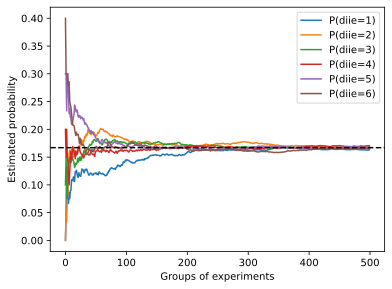

In [141]:
counts = multinomial.Multinomial(10, fair_probs).sample((500, ))
print(counts.shape)
cum_counts = counts.cumsum(dim=0)
print(cum_counts)
estimates = cum_counts / cum_counts.sum(dim=1, keepdims=True)
print(estimates)

d2l.set_figsize((6, 4.5))
for i in range(6):
    d2l.plt.plot(estimates[:, i].numpy(), label=("P(diie=" + str(i + 1) + ")"))
d2l.plt.axhline(y=0.167, color='black', linestyle='dashed')
d2l.plt.gca().set_xlabel('Groups of experiments')
d2l.plt.gca().set_ylabel('Estimated probability')
d2l.plt.legend()

In [145]:
a = torch.tensor(
    [[1, 2, 3],
    [1, 2, 3],
    [1, 2, 3]]
)

In [148]:
a.cumsum()

tensor([[1, 3, 6],
        [1, 3, 6],
        [1, 3, 6]])